In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [ ]:
X, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

np.random.seed(13)

X_stretched = np.dot(X, np.random.randn(2, 2))

'''
plt.figure(figsize=(11, 7))
plt.scatter(X_stretched[0], X_stretched[1])
plt.show()
'''
'''covariance_type равным

spherical
diag
full
'''

gm_sp = GaussianMixture(n_components=4, random_state=0, covariance_type='spherical').fit(X_stretched)
gm_di = GaussianMixture(n_components=4, random_state=0, covariance_type='diag').fit(X_stretched)
gm_fu = GaussianMixture(n_components=4, random_state=0, covariance_type='full').fit(X_stretched)
#gm.means_

predict = gm_sp.predict(X_stretched)

plt.figure(figsize=(14, 9))
#plt.scatter(X[:, 0], X[:, 1], c='b')
#plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c='y', marker='.')
plt.title('Spherical')
plt.scatter(X_stretched[predict == 0][:, 0], X_stretched[predict == 0][:, 1], c='y', marker='.')
plt.scatter(X_stretched[predict == 1][:, 0], X_stretched[predict == 1][:, 1], c='k', marker='.')
plt.scatter(X_stretched[predict == 2][:, 0], X_stretched[predict == 2][:, 1], c='b', marker='.')
plt.scatter(X_stretched[predict == 3][:, 0], X_stretched[predict == 3][:, 1], c='c', marker='.')

plt.scatter(gm_sp.means_[:, 0], gm_sp.means_[:, 1], c='r', label='spherical', marker='o')
#plt.scatter(gm_di.means_[:, 0], gm_di.means_[:, 1], c='g', label='diag', marker='^')
#plt.scatter(gm_fu.means_[:, 0], gm_fu.means_[:, 1], c='b', label='full', marker='^')
plt.legend()
plt.show()

predict = gm_di.predict(X_stretched)

plt.figure(figsize=(14, 9))
plt.title('Diag')
plt.scatter(X_stretched[predict == 0][:, 0], X_stretched[predict == 0][:, 1], c='y', marker='.')
plt.scatter(X_stretched[predict == 1][:, 0], X_stretched[predict == 1][:, 1], c='k', marker='.')
plt.scatter(X_stretched[predict == 2][:, 0], X_stretched[predict == 2][:, 1], c='b', marker='.')
plt.scatter(X_stretched[predict == 3][:, 0], X_stretched[predict == 3][:, 1], c='c', marker='.')
plt.scatter(gm_di.means_[:, 0], gm_di.means_[:, 1], c='r', label='diag', marker='o')
plt.legend()
plt.show()

predict = gm_fu.predict(X_stretched)

plt.figure(figsize=(14, 9))
plt.title('Full')
plt.scatter(X_stretched[predict == 0][:, 0], X_stretched[predict == 0][:, 1], c='y', marker='.')
plt.scatter(X_stretched[predict == 1][:, 0], X_stretched[predict == 1][:, 1], c='k', marker='.')
plt.scatter(X_stretched[predict == 2][:, 0], X_stretched[predict == 2][:, 1], c='b', marker='.')
plt.scatter(X_stretched[predict == 3][:, 0], X_stretched[predict == 3][:, 1], c='c', marker='.')
plt.scatter(gm_fu.means_[:, 0], gm_fu.means_[:, 1], c='r', label='full', marker='o')
plt.legend()
plt.show()

In [ ]:
colors = ['navy', 'turquoise', 'darkorange']


In [ ]:
Plots homework 3
3.LDA_QDA
5.SVR_SVM
6.GaussianProcesses


In [ ]:
#predict = gm.predict(X_stretched)
#X_stretched[predict == 0]

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture
'''
n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])
'''
X, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

np.random.seed(13)

X_stretched = np.dot(X, np.random.randn(2, 2))
X_train = X_stretched

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=4, covariance_type='full')
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-3., 3.)
y = np.linspace(-2., 4.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

plt.figure(figsize=(14, 9))
CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=10.0),
                 levels=np.array((1, 2, 3.125)))
                 #np.logspace(0, 3, 5))
#CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)
#plt.gca().set_aspect('equal')
plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

In [ ]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

#print(__doc__)

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


def plot_results(X, Y, means, covariances, index, title):
    splot = plt.subplot(1, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y == i):
            continue
        plt.scatter(X[Y == i, 0], X[Y == i, 1], .8, color=color)

        #point = np.quantile(X[Y == i], 0.5, axis=0)
        #plt.scatter(point[0], point[1], 100, color=color)
        #point = np.quantile(X[Y == i], 0., axis=0)
        #plt.scatter(point[0], point[1], 100, color=color)
        
        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)                  # прозрачность эллипса
        splot.add_artist(ell)

    plt.xlim(-3., 2.5)
    plt.ylim(-2., 4.5)
    plt.title(title)
    #plt.xticks(())
    #plt.yticks(())




plt.figure(figsize=(14, 7))
plt.subplots_adjust(bottom=.04, top=0.95, hspace=.2, wspace=.05,
                    left=.03, right=.97)

X, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

np.random.seed(13)

X_stretched = np.dot(X, np.random.randn(2, 2))

# Fit a Gaussian mixture with EM using ten components
gmm = mixture.GaussianMixture(n_components=4, covariance_type='full').fit(X_stretched)

plot_results(X_stretched, gmm.predict(X_stretched), gmm.means_, gmm.covariances_, 0,
             'Expectation-maximization')


plt.show()

In [ ]:
gmm.score_samples(X_stretched)
np.quantile(X_stretched, 0.5, axis=0)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold


colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(5 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    #make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]

x = [5,7,11,15,16,17,18]
y = [25, 18, 17, 9, 8, 5, 8]

nstd = 2
ax = plt.subplot(111)

cov = np.cov(x, y)
vals, vecs = eigsorted(cov)
theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
w, h = 2 * nstd * np.sqrt(vals)
ell = Ellipse(xy=(np.mean(x), np.mean(y)),
              width=w, height=h,
              angle=theta, color='black')
ell.set_facecolor('none')
ax.add_artist(ell)
plt.scatter(x, y)
plt.show()

In [3]:
#https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)
    
    
    
    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    
    ellipse.set_clip_box(ax.bbox)
    ellipse.set_alpha(0.5 - 0.125 * n_std)
    
    return ax.add_patch(ellipse)

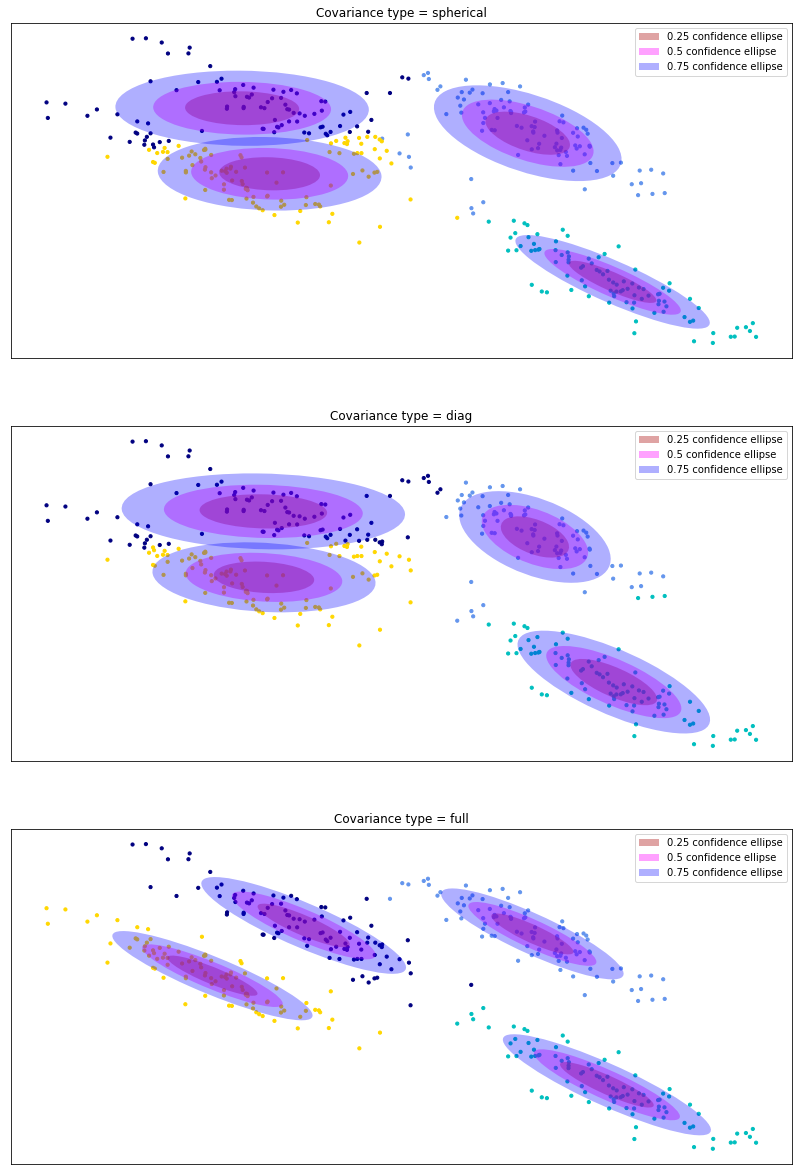

In [146]:
X, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

np.random.seed(13)

X_stretched = np.dot(X, np.random.randn(2, 2))

x, y = X_stretched[:, 0], X_stretched[:, 1]

#colors = ['navy', 'c', 'cornflowerblue', 'gold', 'darkorange']

n_classes = 4
gm = {cov_type: GaussianMixture(n_components=n_classes, covariance_type=cov_type, random_state=1) 
      for cov_type in ['spherical', 'diag', 'full']}

fig, ax = plt.subplots(nrows=len(gm.items()), figsize=(14, 21))

for index, (name, estimator) in enumerate(gm.items()):
    
    estimator.fit(X_stretched)
    predict = estimator.predict(X_stretched)
    ax[index].scatter(x, y, s=10, c=np.array(['navy', 'c', 'cornflowerblue', 'gold'])[predict])

    for i in range(4):
        if i == 1:
            ax[index].legend()
        confidence_ellipse(x[predict == i], y[predict == i], ax[index], n_std=0.6745,
                       label=r'0.25 confidence ellipse', facecolor='firebrick')
        confidence_ellipse(x[predict == i], y[predict == i], ax[index], n_std=1.0518,
                       label=r'0.5 confidence ellipse', facecolor='fuchsia')
        confidence_ellipse(x[predict == i], y[predict == i], ax[index], n_std=1.4986,
                       label=r'0.75 confidence ellipse', facecolor='blue')

    ax[index].set_title('Covariance type = ' + name)
    ax[index].set_xticks(())
    ax[index].set_yticks(())
    
plt.show()

в) обучить модель GaussianMixture на выборке data. Сколько нужно взять компонент? (вовсе не 10, попробуйте разное количество, а лучше подумайте какой-то критерий выбора оптимального количества)

г) из полученной модели гауссовской смеси смоделируйне новую выбоку размера 100 (метод sample для GaussianMixture)

д) применим обратное преобразование pca, чтобы восстановить полный вектор

е) нарисуйте 100 получившихся картинок. Вот пример 100 картинок, которые могли бы получиться

In [85]:
def standartization(features):
    return (features - features.mean(axis = 0)) / features.std(axis = 0)

def decrypt(x, xrange = 16):
    length = len(x)
    x_whitened = standartization(np.reshape(x, (np.size(x))))
    weights = np.linspace(np.min(x_whitened), np.max(x_whitened), num=xrange)
    #np.array([i for i in range(xrange)])
    #weights_normed = np.sort(weights) / np.sum(weights)
    #weights_bounded = np.cumsum(weights_normed)
    weights_bounded = np.cumsum(weights)
    
    ans = np.zeros(np.size(x), dtype='int32')
    for j in range(np.size(x)):
        for i in range(xrange):
            if(x_whitened[j] < weights_bounded[i]):
                ans[j] = np.argsort(weights)[i]
                break;
    ans = ans.reshape((length, 8, 8))
    return ans

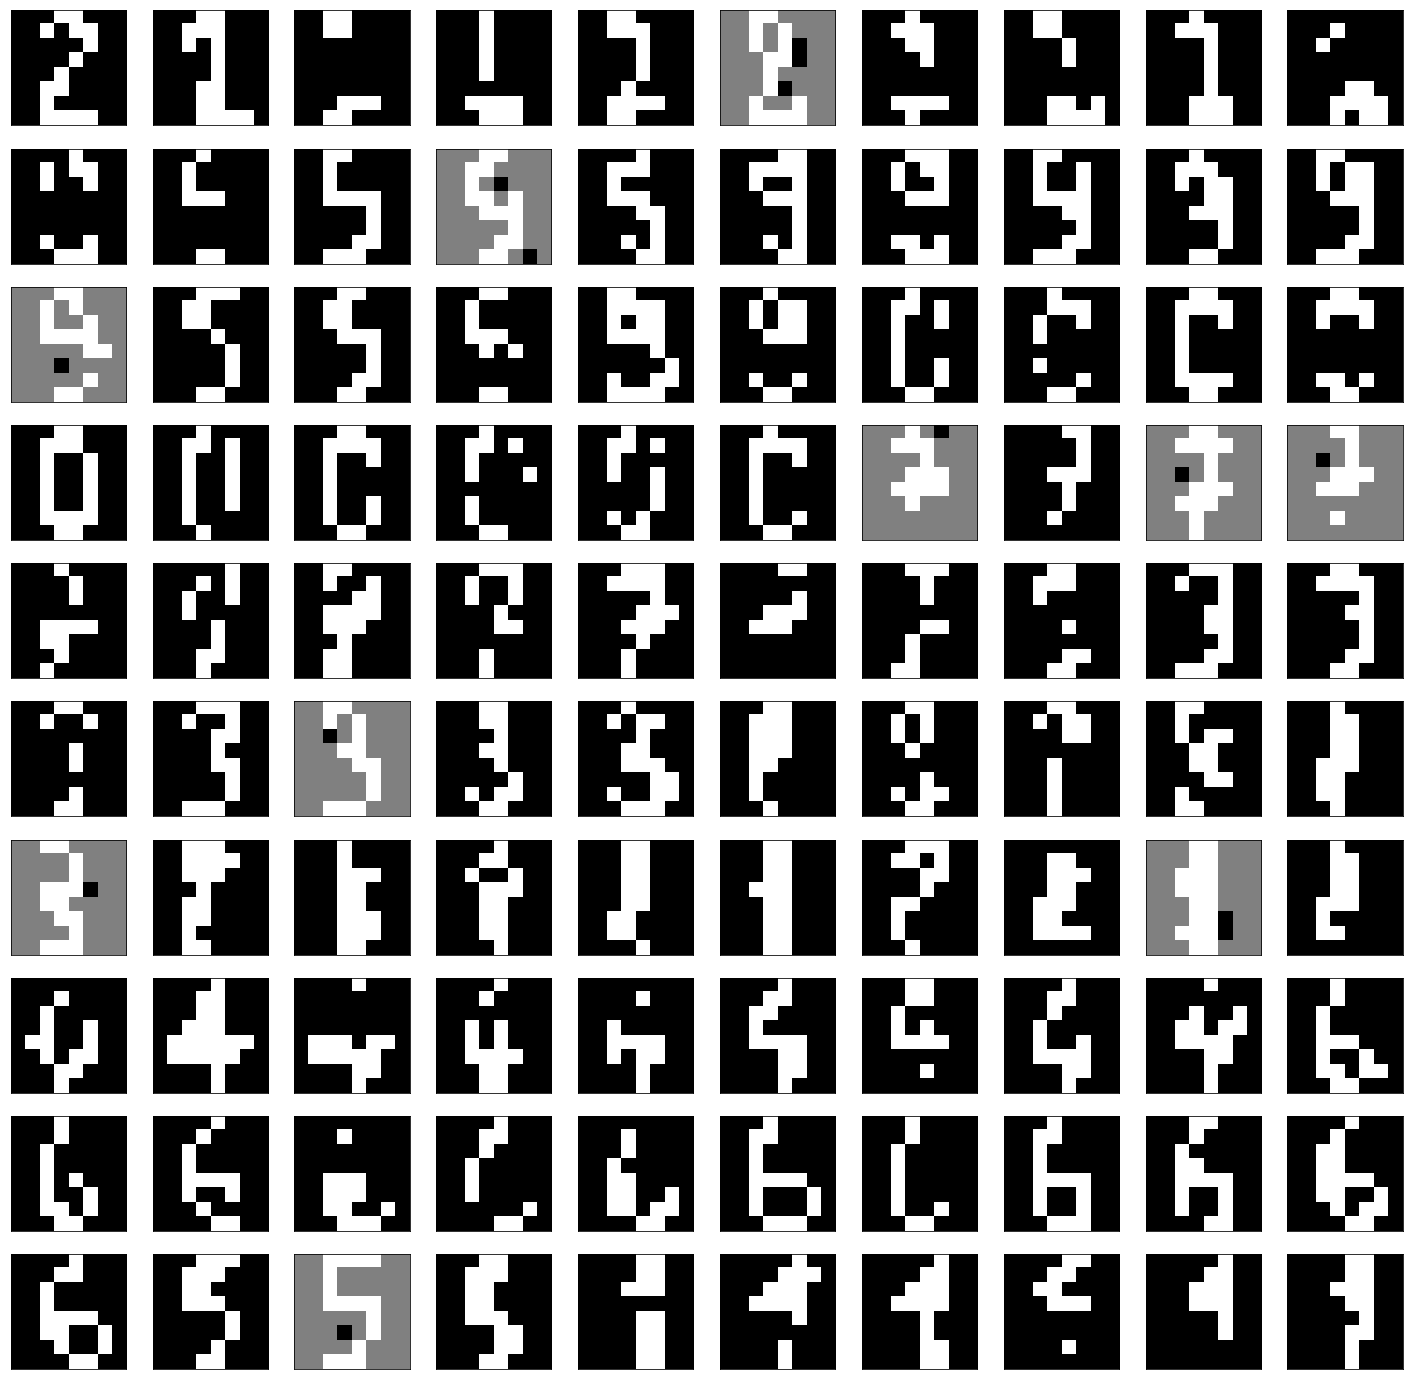

In [156]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()

pca = PCA(0.95)

data = pca.fit_transform(digits.data)

#print(np.shape(digits.images))
#data[0]
#plt.imshow(digits.images[0])
#plt.show()

np.random.seed(13)

n_classes = 10        # 1 ... 10
cov_type = 'full'    # 'spherical', 'diag', 'full' 'tied'
gmm = GaussianMixture(n_components=n_classes, covariance_type=cov_type, random_state=0)
gmm.fit(data)
sample, keys = gmm.sample(n_samples=100)

sample_digits = pca.inverse_transform(sample)

sample_digits = decrypt(sample_digits)
pca_images = np.array(sample_digits, dtype='int32')
#pca_images.shape
#decrypt(sample_digits)
#, digits.data[0]
#np.max(digits.data), np.min(digits.data)

fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(25, 25))
for i in range(100):
    ax[i // 10, i % 10].imshow(pca_images[i], cmap='gray')
    ax[i // 10, i % 10].set_xticks(())
    ax[i // 10, i % 10].set_yticks(())

fig.set_figwidth(25)    
fig.set_figheight(25) 
plt.show()

# Идейно n_classes можно выбирать на основе скора из самого gmm, но пока хз как

In [48]:
len(np.reshape(sample_digits, (np.size(sample_digits)))), np.shape(sample_digits), len(sample_digits), np.size(sample_digits)

(6400, (100, 64), 100, 6400)